In [11]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from SIRSData import SIRG
sig = SIRG(N = 1024)
N=2000


traj=[]
length=[]
for i in range(N):
    a = sig.simulate_single(y0=[0.1,0], time_max=10, time_step=0.001, rng=None)
    traj.append(a)
    length.append(len(a))
print(a.shape) 

time = np.linspace(0,10,1001)
print(time.shape)  

(8017, 3)
(1001,)


In [17]:
N=2000
x0=torch.tensor([[0.1,0.]*N]).reshape(-1,2)

traj_true = np.vstack(traj)
local = 'outputs/kmc0.05_seed0/model_best.pkl'
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    tr0 = Net.predict(x0=x0, h=0.01, steps=1000, returnnp=True)
import matplotlib.pyplot as plt
print(tr0.shape)


local = 'outputs/kmc0.1_seed0/model_best.pkl'
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    tr1 = Net.predict(x0=x0, h=0.01, steps=1000, returnnp=True)
import matplotlib.pyplot as plt
print(tr1.shape)

local = 'outputs/kmc0.2_seed0/model_best.pkl'
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    tr2 = Net.predict(x0=x0, h=0.01, steps=1000, returnnp=True)
import matplotlib.pyplot as plt
print(tr2.shape)

print(traj_true.shape)
mean_true = np.zeros([1001, 2])
mean_true[0]=[0.1, 0]
for i in range(1,1001):
    mean_true[i] = (traj_true[(traj_true[:, 0]>0.01*(i-1))&(traj_true[:, 0]<0.01*i), :].mean(axis=0))[1:]
print(mean_true.shape)

(1001, 200, 2)
(1001, 200, 2)
(1001, 200, 2)
(1611916, 3)
[[0.1        0.        ]
 [0.10102068 0.00045402]
 [0.10385367 0.00144462]
 [0.10662486 0.00253165]
 [0.10944116 0.00365248]
 [0.11242653 0.00454752]
 [0.11557084 0.00567245]
 [0.11882176 0.00677266]
 [0.12157608 0.00803878]
 [0.12496818 0.00929104]]
(1001, 2)


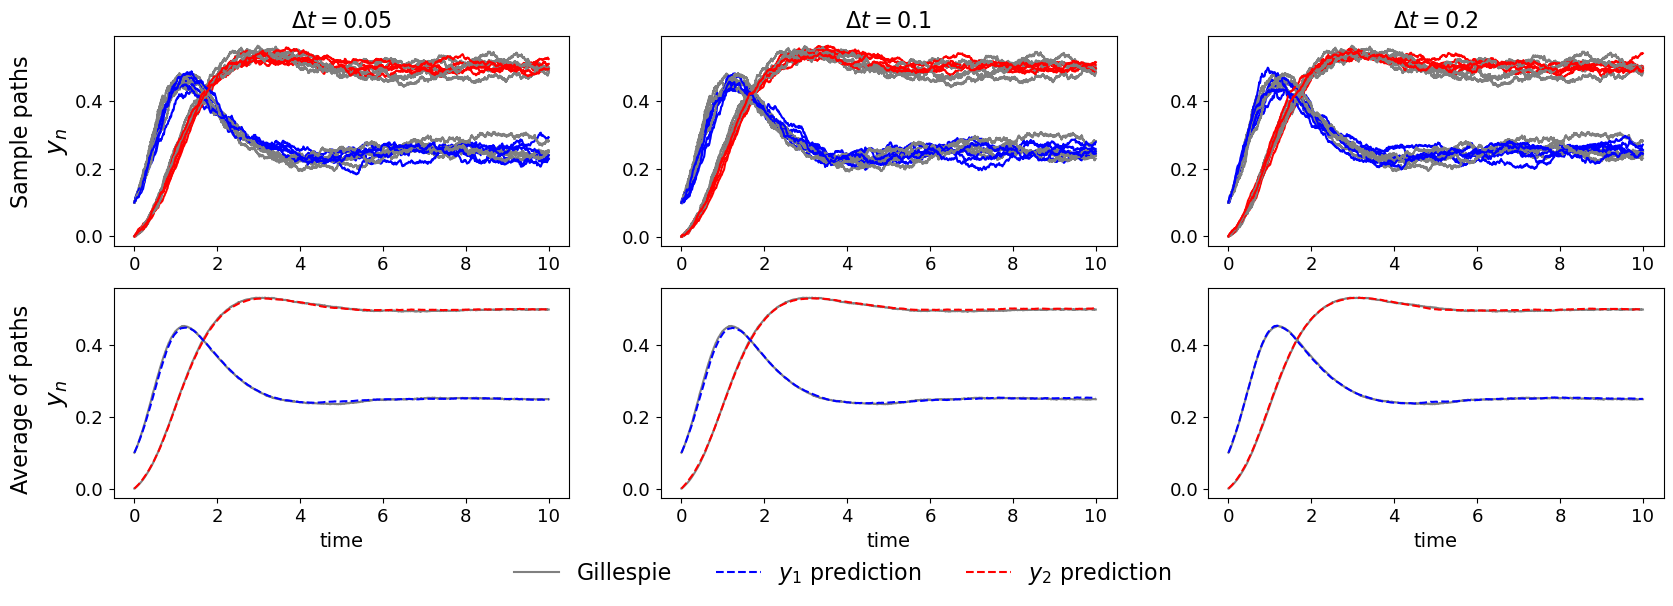

In [19]:
fig, ax=plt.subplots(2,3, figsize=(20,6))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
        wspace=0.2, hspace=0.2)

time = np.linspace(0,10,1001)
ind=0
for i in range(5):
    #plot gillespie
    ax[0, 0].plot(traj_true[ind:ind+int(length[i]),0], traj_true[ind:ind+int(length[i]),1], color='gray', label='Gillespie')
    ax[0, 0].plot(traj_true[ind:ind+int(length[i]),0], traj_true[ind:ind+int(length[i]),2], color='gray') 
    ax[0, 1].plot(traj_true[ind:ind+int(length[i]),0], traj_true[ind:ind+int(length[i]),1], color='gray', label='Gillespie')
    ax[0, 1].plot(traj_true[ind:ind+int(length[i]),0], traj_true[ind:ind+int(length[i]),2], color='gray') 
    
    ax[0, 2].plot(traj_true[ind:ind+int(length[i]),0], traj_true[ind:ind+int(length[i]),1], color='gray', label='Gillespie')
    ax[0, 2].plot(traj_true[ind:ind+int(length[i]),0], traj_true[ind:ind+int(length[i]),2], color='gray') 
    ind=ind+int(length[i])
    
    # plot prediction
    ax[0, 0].plot(time, tr0[:,i, 0], color='blue', label='$y_1$ prediction')
    ax[0, 0].plot(time, tr0[:,i, 1], color='red', label='$y_2$ prediction')

    ax[0, 1].plot(time, tr1[:,i, 0], color='blue', label='$y_1$ prediction')
    ax[0, 1].plot(time, tr1[:,i, 1], color='red', label='$y_2$ prediction')

    ax[0, 2].plot(time, tr2[:,i, 0], color='blue', label='$y_1$ prediction')
    ax[0, 2].plot(time, tr2[:,i, 1], color='red', label='$y_2$ prediction')

    

ax[1, 0].plot(time, mean_true[:, 0], color='gray', label='Gillespie')
ax[1, 0].plot(time, mean_true[:, 1], color='gray')

ax[1, 1].plot(time, mean_true[:, 0], color='gray', label='Gillespie')
ax[1, 1].plot(time, mean_true[:, 1], color='gray')

ax[1, 2].plot(time, mean_true[:, 0], color='gray', label='Gillespie')
ax[1, 2].plot(time, mean_true[:, 1], color='gray')

pre_m = tr0.mean(axis=1)
ax[1, 0].plot(time, pre_m[:, 0], color='blue', linestyle='--', label='$y_1$ prediction')
ax[1, 0].plot(time, pre_m[:, 1], color='red', linestyle='--', label='$y_2$ prediction')

pre_m = tr1.mean(axis=1)
ax[1, 1].plot(time, pre_m[:, 0], color='blue', linestyle='--', label='$y_1$ prediction')
ax[1, 1].plot(time, pre_m[:, 1], color='red', linestyle='--', label='$y_2$ prediction')

pre_m = tr2.mean(axis=1)
ax[1, 2].plot(time, pre_m[:, 0], color='blue', linestyle='--', label='$y_1$ prediction')
ax[1, 2].plot(time, pre_m[:, 1], color='red', linestyle='--', label='$y_2$ prediction')

for i in range(3):
    ax[0, i].tick_params(labelsize=13)
    ax[1, i].tick_params(labelsize=13)
    ax[1, i].set_xlabel('time', fontsize=14) 

ax[0, 0].set_title('$\Delta t=0.05$', fontsize=16, loc= 'center') 
ax[0, 1].set_title('$\Delta t=0.1$', fontsize=16, loc= 'center') 
ax[0, 2].set_title('$\Delta t=0.2$', fontsize=16, loc= 'center') 

ax[0, 0].text(-3., 0.1, 'Sample paths', fontsize=16, rotation='vertical')
ax[1, 0].text(-3., 0, 'Average of paths', fontsize=16, rotation='vertical')


ax[1, 1].legend(loc='upper center', bbox_to_anchor=(0.4, -0.2), 
           fontsize=16, frameon=False, ncol=3) 
ax[0, 0].set_ylabel('$y_n$', fontsize=18)
ax[1, 0].set_ylabel('$y_n$', fontsize=18)

fig.savefig('kmc_traj_sirs.pdf', bbox_inches='tight', dpi=100)